In [1]:
import torch.nn as nn

from model import NeuralNetModel, LogisticRegressionClassifier
from dataset import PatientDataset, M1Imputation, M2Imputation
from utils import UtilityFunction, RealOutcomesSimulator

import torch
import random
import numpy as np

import matplotlib.pyplot as plt


In [2]:
# Set the random seed for PyTorch
seed = 42  # Choose any integer
torch.manual_seed(seed)

# If you're using a GPU
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # If you use multiple GPUs

# Set the random seed for Python's built-in random module
random.seed(seed)

# Set the random seed for NumPy
np.random.seed(seed)

# Ensure deterministic behavior for some operations
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

dataset_train = PatientDataset.from_file("data/train.npz")
dataset_val = PatientDataset.from_file("data/val.npz")
dataset_test = PatientDataset.from_file("data/test.npz")
print(f"Train: {len(dataset_train)} patients")
print(f"Val: {len(dataset_val)} patients")
print(f"Test: {len(dataset_test)} patients")

def data_imputation(datasets={}, method=M2Imputation):

    imputed_datasets = {}
    
    for key in datasets.keys():
        m = method(dataset=datasets[key])
        imputed_datasets[key] = m.impute_dataset()

    return imputed_datasets

imputed_datasets = data_imputation(
    datasets={
        'train':dataset_train, 'val':dataset_val, 'test':dataset_test,
    },
    method=M2Imputation
)


Train: 5000 patients
Val: 5000 patients
Test: 5000 patients
global_mean_features.shape = (40,)


/home/maschine/Desktop/6_7300_proj2/dataset.py:70: RuntimeWarning: Mean of empty slice
  patient_mean_features[patient_idx, :] = np.nanmean(x, axis=0)
/home/maschine/Desktop/6_7300_proj2/dataset.py:78: RuntimeWarning: Mean of empty slice
  global_mean_features = np.nanmean(patient_mean_features, axis=0)


global_mean_features.shape = (40,)
global_mean_features.shape = (40,)


In [3]:
from model import LRModel
from sklearn.linear_model import LogisticRegression

my_model = LRModel(model=LogisticRegression(
    max_iter=100,
))
my_model.fit(
    data = imputed_datasets['train']
)

In [4]:
utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:07<00:00, 655.99it/s]

 the utility achieved is: -6214.088888888887


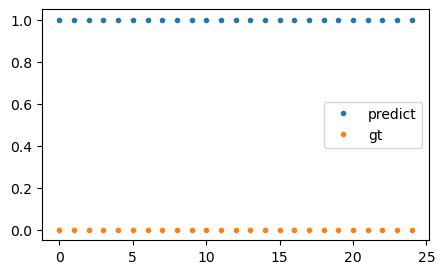

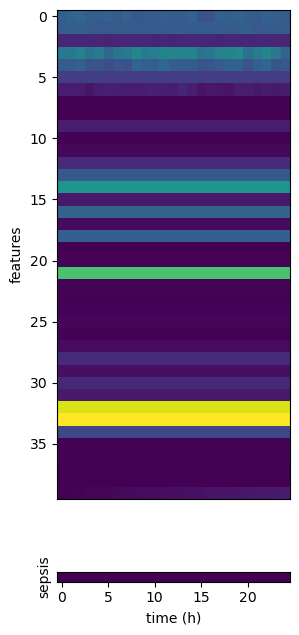

In [5]:
patient_idx = 0

fig, ax = plt.subplots(1,1, figsize=(5, 3))

ax.plot(utility['preds'][patient_idx], '.', label='predict')
ax.plot(imputed_datasets['train'][patient_idx][1], '.', label='gt')
plt.legend()
plt.show()

from visualize_data import plot_data_heatmap

plot_data_heatmap(imputed_datasets['train'], patient_no=patient_idx)

In [6]:
my_model = NeuralNetModel()
device = 'cuda'
my_model.fit(
    train_data = imputed_datasets['train'],
    val_data = imputed_datasets['val'],
    config = {
    'classifer':LogisticRegressionClassifier,
    'lr':1e-3, 
    'criteria':nn.BCELoss(), 
    'n_epoch':10,
    'batch_size':128,
    'device':device,
    })

utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")

input_dim = 240


 10%|█         | 1/10 [00:01<00:11,  1.29s/it]

Epoch [1/10], Training Loss: 0.4520, Val Loss: 0.2755
confusion matrix: {'TP': 494, 'TN': 178316, 'FP': 11230, 'FN': 3466}


 20%|██        | 2/10 [00:02<00:10,  1.27s/it]

Epoch [2/10], Training Loss: 0.2057, Val Loss: 0.1444
confusion matrix: {'TP': 4, 'TN': 189525, 'FP': 21, 'FN': 3956}


 30%|███       | 3/10 [00:03<00:08,  1.26s/it]

Epoch [3/10], Training Loss: 0.1284, Val Loss: 0.0989
confusion matrix: {'TP': 1, 'TN': 189545, 'FP': 1, 'FN': 3959}


 40%|████      | 4/10 [00:05<00:07,  1.26s/it]

Epoch [4/10], Training Loss: 0.1010, Val Loss: 0.0830
confusion matrix: {'TP': 3, 'TN': 189538, 'FP': 8, 'FN': 3957}


 50%|█████     | 5/10 [00:06<00:06,  1.26s/it]

Epoch [5/10], Training Loss: 0.0909, Val Loss: 0.0761
confusion matrix: {'TP': 17, 'TN': 189527, 'FP': 19, 'FN': 3943}


 60%|██████    | 6/10 [00:07<00:05,  1.27s/it]

Epoch [6/10], Training Loss: 0.0875, Val Loss: 0.0757
confusion matrix: {'TP': 30, 'TN': 189516, 'FP': 30, 'FN': 3930}


 70%|███████   | 7/10 [00:08<00:03,  1.27s/it]

Epoch [7/10], Training Loss: 0.0867, Val Loss: 0.0774
confusion matrix: {'TP': 44, 'TN': 189492, 'FP': 54, 'FN': 3916}


 80%|████████  | 8/10 [00:10<00:02,  1.29s/it]

Epoch [8/10], Training Loss: 0.0866, Val Loss: 0.0760
confusion matrix: {'TP': 54, 'TN': 189473, 'FP': 73, 'FN': 3906}


 90%|█████████ | 9/10 [00:11<00:01,  1.29s/it]

Epoch [9/10], Training Loss: 0.0865, Val Loss: 0.0784
confusion matrix: {'TP': 53, 'TN': 189469, 'FP': 77, 'FN': 3907}


100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


Epoch [10/10], Training Loss: 0.0865, Val Loss: 0.0792
confusion matrix: {'TP': 50, 'TN': 189464, 'FP': 82, 'FN': 3910}
Training complete.


100%|██████████| 5000/5000 [00:16<00:00, 299.73it/s]

 the utility achieved is: -5661.883333333319


In [7]:
from loss import CustomBCELoss

my_model = NeuralNetModel()
device = 'cuda'
my_model.fit(
    train_data = imputed_datasets['train'],
    val_data = imputed_datasets['val'],
    config = {
    'classifer':LogisticRegressionClassifier,
    'lr':1e-2, 
    'criteria':CustomBCELoss(scale_factor=5), 
    'n_epoch':10,
    'batch_size':128,
    'device':device,
    })

utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")

input_dim = 240


  2%|▏         | 1/50 [00:01<01:06,  1.36s/it]

Epoch [1/50], Training Loss: 0.5392, Val Loss: 0.3688
confusion matrix: {'TP': 1364, 'TN': 170137, 'FP': 19409, 'FN': 2596}


  4%|▍         | 2/50 [00:02<01:06,  1.38s/it]

Epoch [2/50], Training Loss: 0.3388, Val Loss: 0.2779
confusion matrix: {'TP': 464, 'TN': 187167, 'FP': 2379, 'FN': 3496}


  6%|▌         | 3/50 [00:04<01:05,  1.38s/it]

Epoch [3/50], Training Loss: 0.2921, Val Loss: 0.2595
confusion matrix: {'TP': 416, 'TN': 187451, 'FP': 2095, 'FN': 3544}


  8%|▊         | 4/50 [00:05<01:03,  1.37s/it]

Epoch [4/50], Training Loss: 0.2816, Val Loss: 0.2579
confusion matrix: {'TP': 437, 'TN': 187365, 'FP': 2181, 'FN': 3523}


 10%|█         | 5/50 [00:06<01:01,  1.37s/it]

Epoch [5/50], Training Loss: 0.2797, Val Loss: 0.2569
confusion matrix: {'TP': 450, 'TN': 187244, 'FP': 2302, 'FN': 3510}


 12%|█▏        | 6/50 [00:08<01:00,  1.38s/it]

Epoch [6/50], Training Loss: 0.2791, Val Loss: 0.2585
confusion matrix: {'TP': 454, 'TN': 187248, 'FP': 2298, 'FN': 3506}


 14%|█▍        | 7/50 [00:09<00:59,  1.39s/it]

Epoch [7/50], Training Loss: 0.2789, Val Loss: 0.2577
confusion matrix: {'TP': 513, 'TN': 187180, 'FP': 2366, 'FN': 3447}


 16%|█▌        | 8/50 [00:11<00:58,  1.39s/it]

Epoch [8/50], Training Loss: 0.2788, Val Loss: 0.2603
confusion matrix: {'TP': 481, 'TN': 187169, 'FP': 2377, 'FN': 3479}


 18%|█▊        | 9/50 [00:12<00:56,  1.38s/it]

Epoch [9/50], Training Loss: 0.2787, Val Loss: 0.2610
confusion matrix: {'TP': 488, 'TN': 187152, 'FP': 2394, 'FN': 3472}


 20%|██        | 10/50 [00:13<00:55,  1.38s/it]

Epoch [10/50], Training Loss: 0.2787, Val Loss: 0.2610
confusion matrix: {'TP': 501, 'TN': 187153, 'FP': 2393, 'FN': 3459}


 22%|██▏       | 11/50 [00:15<00:54,  1.40s/it]

Epoch [11/50], Training Loss: 0.2783, Val Loss: 0.2601
confusion matrix: {'TP': 475, 'TN': 187156, 'FP': 2390, 'FN': 3485}


 24%|██▍       | 12/50 [00:16<00:53,  1.40s/it]

Epoch [12/50], Training Loss: 0.2785, Val Loss: 0.2583
confusion matrix: {'TP': 494, 'TN': 187186, 'FP': 2360, 'FN': 3466}


 26%|██▌       | 13/50 [00:18<00:51,  1.40s/it]

Epoch [13/50], Training Loss: 0.2784, Val Loss: 0.2591
confusion matrix: {'TP': 495, 'TN': 187184, 'FP': 2362, 'FN': 3465}


 28%|██▊       | 14/50 [00:19<00:50,  1.40s/it]

Epoch [14/50], Training Loss: 0.2782, Val Loss: 0.2633
confusion matrix: {'TP': 498, 'TN': 187153, 'FP': 2393, 'FN': 3462}


 30%|███       | 15/50 [00:20<00:48,  1.40s/it]

Epoch [15/50], Training Loss: 0.2779, Val Loss: 0.2662
confusion matrix: {'TP': 502, 'TN': 187172, 'FP': 2374, 'FN': 3458}


 32%|███▏      | 16/50 [00:22<00:47,  1.41s/it]

Epoch [16/50], Training Loss: 0.2780, Val Loss: 0.2627
confusion matrix: {'TP': 502, 'TN': 187202, 'FP': 2344, 'FN': 3458}


 34%|███▍      | 17/50 [00:23<00:46,  1.41s/it]

Epoch [17/50], Training Loss: 0.2783, Val Loss: 0.2588
confusion matrix: {'TP': 495, 'TN': 187157, 'FP': 2389, 'FN': 3465}


 36%|███▌      | 18/50 [00:25<00:45,  1.41s/it]

Epoch [18/50], Training Loss: 0.2777, Val Loss: 0.2614
confusion matrix: {'TP': 488, 'TN': 187195, 'FP': 2351, 'FN': 3472}


 38%|███▊      | 19/50 [00:26<00:43,  1.41s/it]

Epoch [19/50], Training Loss: 0.2780, Val Loss: 0.2629
confusion matrix: {'TP': 473, 'TN': 187166, 'FP': 2380, 'FN': 3487}


 40%|████      | 20/50 [00:27<00:42,  1.41s/it]

Epoch [20/50], Training Loss: 0.2781, Val Loss: 0.2561
confusion matrix: {'TP': 501, 'TN': 187144, 'FP': 2402, 'FN': 3459}


 42%|████▏     | 21/50 [00:29<00:40,  1.41s/it]

Epoch [21/50], Training Loss: 0.2779, Val Loss: 0.2623
confusion matrix: {'TP': 489, 'TN': 187173, 'FP': 2373, 'FN': 3471}


 44%|████▍     | 22/50 [00:30<00:39,  1.41s/it]

Epoch [22/50], Training Loss: 0.2780, Val Loss: 0.2616
confusion matrix: {'TP': 500, 'TN': 187140, 'FP': 2406, 'FN': 3460}


 46%|████▌     | 23/50 [00:32<00:38,  1.41s/it]

Epoch [23/50], Training Loss: 0.2781, Val Loss: 0.2609
confusion matrix: {'TP': 492, 'TN': 187199, 'FP': 2347, 'FN': 3468}


 48%|████▊     | 24/50 [00:33<00:36,  1.42s/it]

Epoch [24/50], Training Loss: 0.2775, Val Loss: 0.2618
confusion matrix: {'TP': 495, 'TN': 187166, 'FP': 2380, 'FN': 3465}


 50%|█████     | 25/50 [00:35<00:35,  1.42s/it]

Epoch [25/50], Training Loss: 0.2778, Val Loss: 0.2569
confusion matrix: {'TP': 505, 'TN': 187107, 'FP': 2439, 'FN': 3455}


 52%|█████▏    | 26/50 [00:36<00:34,  1.42s/it]

Epoch [26/50], Training Loss: 0.2776, Val Loss: 0.2645
confusion matrix: {'TP': 489, 'TN': 187140, 'FP': 2406, 'FN': 3471}


 54%|█████▍    | 27/50 [00:37<00:32,  1.42s/it]

Epoch [27/50], Training Loss: 0.2777, Val Loss: 0.2639
confusion matrix: {'TP': 501, 'TN': 187164, 'FP': 2382, 'FN': 3459}


 56%|█████▌    | 28/50 [00:39<00:31,  1.43s/it]

Epoch [28/50], Training Loss: 0.2778, Val Loss: 0.2631
confusion matrix: {'TP': 508, 'TN': 187164, 'FP': 2382, 'FN': 3452}


 58%|█████▊    | 29/50 [00:40<00:29,  1.41s/it]

Epoch [29/50], Training Loss: 0.2778, Val Loss: 0.2579
confusion matrix: {'TP': 481, 'TN': 187181, 'FP': 2365, 'FN': 3479}


 60%|██████    | 30/50 [00:42<00:28,  1.40s/it]

Epoch [30/50], Training Loss: 0.2777, Val Loss: 0.2633
confusion matrix: {'TP': 480, 'TN': 187212, 'FP': 2334, 'FN': 3480}


 62%|██████▏   | 31/50 [00:43<00:26,  1.40s/it]

Epoch [31/50], Training Loss: 0.2777, Val Loss: 0.2626
confusion matrix: {'TP': 493, 'TN': 187183, 'FP': 2363, 'FN': 3467}


 64%|██████▍   | 32/50 [00:44<00:25,  1.41s/it]

Epoch [32/50], Training Loss: 0.2778, Val Loss: 0.2597
confusion matrix: {'TP': 508, 'TN': 187137, 'FP': 2409, 'FN': 3452}


 66%|██████▌   | 33/50 [00:46<00:23,  1.40s/it]

Epoch [33/50], Training Loss: 0.2776, Val Loss: 0.2594
confusion matrix: {'TP': 503, 'TN': 187154, 'FP': 2392, 'FN': 3457}


 68%|██████▊   | 34/50 [00:47<00:22,  1.40s/it]

Epoch [34/50], Training Loss: 0.2778, Val Loss: 0.2623
confusion matrix: {'TP': 484, 'TN': 187187, 'FP': 2359, 'FN': 3476}


 70%|███████   | 35/50 [00:49<00:21,  1.42s/it]

Epoch [35/50], Training Loss: 0.2777, Val Loss: 0.2643
confusion matrix: {'TP': 495, 'TN': 187122, 'FP': 2424, 'FN': 3465}


 72%|███████▏  | 36/50 [00:50<00:19,  1.42s/it]

Epoch [36/50], Training Loss: 0.2776, Val Loss: 0.2637
confusion matrix: {'TP': 496, 'TN': 187201, 'FP': 2345, 'FN': 3464}


 74%|███████▍  | 37/50 [00:51<00:18,  1.42s/it]

Epoch [37/50], Training Loss: 0.2777, Val Loss: 0.2582
confusion matrix: {'TP': 485, 'TN': 187157, 'FP': 2389, 'FN': 3475}


 76%|███████▌  | 38/50 [00:53<00:17,  1.42s/it]

Epoch [38/50], Training Loss: 0.2772, Val Loss: 0.2604
confusion matrix: {'TP': 522, 'TN': 187189, 'FP': 2357, 'FN': 3438}


 78%|███████▊  | 39/50 [00:54<00:15,  1.43s/it]

Epoch [39/50], Training Loss: 0.2778, Val Loss: 0.2594
confusion matrix: {'TP': 496, 'TN': 187180, 'FP': 2366, 'FN': 3464}


 80%|████████  | 40/50 [00:56<00:14,  1.42s/it]

Epoch [40/50], Training Loss: 0.2775, Val Loss: 0.2599
confusion matrix: {'TP': 517, 'TN': 187159, 'FP': 2387, 'FN': 3443}


 82%|████████▏ | 41/50 [00:57<00:12,  1.42s/it]

Epoch [41/50], Training Loss: 0.2776, Val Loss: 0.2600
confusion matrix: {'TP': 514, 'TN': 187137, 'FP': 2409, 'FN': 3446}


 84%|████████▍ | 42/50 [00:59<00:11,  1.41s/it]

Epoch [42/50], Training Loss: 0.2776, Val Loss: 0.2617
confusion matrix: {'TP': 491, 'TN': 187162, 'FP': 2384, 'FN': 3469}


 86%|████████▌ | 43/50 [01:00<00:09,  1.39s/it]

Epoch [43/50], Training Loss: 0.2775, Val Loss: 0.2629
confusion matrix: {'TP': 486, 'TN': 187184, 'FP': 2362, 'FN': 3474}


 88%|████████▊ | 44/50 [01:01<00:08,  1.39s/it]

Epoch [44/50], Training Loss: 0.2771, Val Loss: 0.2656
confusion matrix: {'TP': 513, 'TN': 187149, 'FP': 2397, 'FN': 3447}


 90%|█████████ | 45/50 [01:03<00:06,  1.39s/it]

Epoch [45/50], Training Loss: 0.2776, Val Loss: 0.2616
confusion matrix: {'TP': 489, 'TN': 187156, 'FP': 2390, 'FN': 3471}


 92%|█████████▏| 46/50 [01:04<00:05,  1.40s/it]

Epoch [46/50], Training Loss: 0.2772, Val Loss: 0.2572
confusion matrix: {'TP': 502, 'TN': 187155, 'FP': 2391, 'FN': 3458}


 94%|█████████▍| 47/50 [01:06<00:04,  1.41s/it]

Epoch [47/50], Training Loss: 0.2771, Val Loss: 0.2602
confusion matrix: {'TP': 503, 'TN': 187119, 'FP': 2427, 'FN': 3457}


 96%|█████████▌| 48/50 [01:07<00:02,  1.41s/it]

Epoch [48/50], Training Loss: 0.2774, Val Loss: 0.2641
confusion matrix: {'TP': 492, 'TN': 187184, 'FP': 2362, 'FN': 3468}


 98%|█████████▊| 49/50 [01:08<00:01,  1.41s/it]

Epoch [49/50], Training Loss: 0.2774, Val Loss: 0.2591
confusion matrix: {'TP': 501, 'TN': 187156, 'FP': 2390, 'FN': 3459}


100%|██████████| 50/50 [01:10<00:00,  1.40s/it]


Epoch [50/50], Training Loss: 0.2775, Val Loss: 0.2576
confusion matrix: {'TP': 526, 'TN': 187139, 'FP': 2407, 'FN': 3434}
Training complete.


100%|██████████| 5000/5000 [00:17<00:00, 293.99it/s]

 the utility achieved is: -2531.905555555558


In [8]:
from model import MLP

from loss import CustomBCELoss

my_model = NeuralNetModel()
device = 'cuda'
my_model.fit(
    train_data = imputed_datasets['train'],
    val_data = imputed_datasets['val'],
    config = {
    'classifer':MLP,
    'lr':1e-2, 
    'criteria':CustomBCELoss(scale_factor=5), 
    'n_epoch':10,
    'batch_size':128,
    'device':device,
    })

utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")


input_dim = 240


  2%|▏         | 1/50 [00:01<01:20,  1.64s/it]

Epoch [1/50], Training Loss: 0.2481, Val Loss: 0.2945
confusion matrix: {'TP': 828, 'TN': 187092, 'FP': 2454, 'FN': 3132}


  4%|▍         | 2/50 [00:03<01:15,  1.56s/it]

Epoch [2/50], Training Loss: 0.1775, Val Loss: 0.3659
confusion matrix: {'TP': 1788, 'TN': 186436, 'FP': 3110, 'FN': 2172}


  6%|▌         | 3/50 [00:04<01:12,  1.55s/it]

Epoch [3/50], Training Loss: 0.1407, Val Loss: 0.4326
confusion matrix: {'TP': 2373, 'TN': 186348, 'FP': 3198, 'FN': 1587}


  8%|▊         | 4/50 [00:06<01:11,  1.55s/it]

Epoch [4/50], Training Loss: 0.1181, Val Loss: 0.5148
confusion matrix: {'TP': 2788, 'TN': 186472, 'FP': 3074, 'FN': 1172}


 10%|█         | 5/50 [00:07<01:09,  1.55s/it]

Epoch [5/50], Training Loss: 0.0995, Val Loss: 0.6096
confusion matrix: {'TP': 3045, 'TN': 186725, 'FP': 2821, 'FN': 915}


 12%|█▏        | 6/50 [00:09<01:07,  1.54s/it]

Epoch [6/50], Training Loss: 0.0860, Val Loss: 0.7486
confusion matrix: {'TP': 3210, 'TN': 186892, 'FP': 2654, 'FN': 750}


 14%|█▍        | 7/50 [00:10<01:06,  1.55s/it]

Epoch [7/50], Training Loss: 0.0777, Val Loss: 0.8073
confusion matrix: {'TP': 3385, 'TN': 187058, 'FP': 2488, 'FN': 575}


 16%|█▌        | 8/50 [00:12<01:04,  1.55s/it]

Epoch [8/50], Training Loss: 0.0707, Val Loss: 0.8995
confusion matrix: {'TP': 3468, 'TN': 187223, 'FP': 2323, 'FN': 492}


 18%|█▊        | 9/50 [00:13<01:02,  1.53s/it]

Epoch [9/50], Training Loss: 0.0641, Val Loss: 0.9457
confusion matrix: {'TP': 3517, 'TN': 187423, 'FP': 2123, 'FN': 443}


 20%|██        | 10/50 [00:15<01:01,  1.54s/it]

Epoch [10/50], Training Loss: 0.0613, Val Loss: 1.0892
confusion matrix: {'TP': 3584, 'TN': 187517, 'FP': 2029, 'FN': 376}


 22%|██▏       | 11/50 [00:17<01:00,  1.54s/it]

Epoch [11/50], Training Loss: 0.0591, Val Loss: 1.2007
confusion matrix: {'TP': 3602, 'TN': 187595, 'FP': 1951, 'FN': 358}


 24%|██▍       | 12/50 [00:18<00:57,  1.52s/it]

Epoch [12/50], Training Loss: 0.0576, Val Loss: 1.1943
confusion matrix: {'TP': 3658, 'TN': 187722, 'FP': 1824, 'FN': 302}


 26%|██▌       | 13/50 [00:20<00:56,  1.53s/it]

Epoch [13/50], Training Loss: 0.0575, Val Loss: 1.2436
confusion matrix: {'TP': 3685, 'TN': 187705, 'FP': 1841, 'FN': 275}


 28%|██▊       | 14/50 [00:21<00:54,  1.52s/it]

Epoch [14/50], Training Loss: 0.0497, Val Loss: 1.2855
confusion matrix: {'TP': 3694, 'TN': 187879, 'FP': 1667, 'FN': 266}


 30%|███       | 15/50 [00:23<00:53,  1.52s/it]

Epoch [15/50], Training Loss: 0.0494, Val Loss: 1.3904
confusion matrix: {'TP': 3719, 'TN': 187948, 'FP': 1598, 'FN': 241}


 32%|███▏      | 16/50 [00:24<00:51,  1.53s/it]

Epoch [16/50], Training Loss: 0.0488, Val Loss: 1.4322
confusion matrix: {'TP': 3703, 'TN': 187954, 'FP': 1592, 'FN': 257}


 34%|███▍      | 17/50 [00:26<00:50,  1.52s/it]

Epoch [17/50], Training Loss: 0.0510, Val Loss: 1.4626
confusion matrix: {'TP': 3740, 'TN': 188049, 'FP': 1497, 'FN': 220}


 36%|███▌      | 18/50 [00:27<00:48,  1.52s/it]

Epoch [18/50], Training Loss: 0.0507, Val Loss: 1.5150
confusion matrix: {'TP': 3753, 'TN': 188071, 'FP': 1475, 'FN': 207}


 38%|███▊      | 19/50 [00:29<00:47,  1.52s/it]

Epoch [19/50], Training Loss: 0.0462, Val Loss: 1.5614
confusion matrix: {'TP': 3751, 'TN': 188153, 'FP': 1393, 'FN': 209}


 40%|████      | 20/50 [00:30<00:45,  1.53s/it]

Epoch [20/50], Training Loss: 0.0481, Val Loss: 1.6289
confusion matrix: {'TP': 3767, 'TN': 188113, 'FP': 1433, 'FN': 193}


 42%|████▏     | 21/50 [00:32<00:44,  1.53s/it]

Epoch [21/50], Training Loss: 0.0505, Val Loss: 1.6483
confusion matrix: {'TP': 3748, 'TN': 188157, 'FP': 1389, 'FN': 212}


 44%|████▍     | 22/50 [00:33<00:42,  1.53s/it]

Epoch [22/50], Training Loss: 0.0445, Val Loss: 1.7512
confusion matrix: {'TP': 3757, 'TN': 188214, 'FP': 1332, 'FN': 203}


 46%|████▌     | 23/50 [00:35<00:41,  1.53s/it]

Epoch [23/50], Training Loss: 0.0483, Val Loss: 1.8449
confusion matrix: {'TP': 3773, 'TN': 188254, 'FP': 1292, 'FN': 187}


 48%|████▊     | 24/50 [00:36<00:39,  1.53s/it]

Epoch [24/50], Training Loss: 0.0458, Val Loss: 1.8350
confusion matrix: {'TP': 3766, 'TN': 188252, 'FP': 1294, 'FN': 194}


 50%|█████     | 25/50 [00:38<00:38,  1.53s/it]

Epoch [25/50], Training Loss: 0.0439, Val Loss: 1.8893
confusion matrix: {'TP': 3773, 'TN': 188284, 'FP': 1262, 'FN': 187}


 52%|█████▏    | 26/50 [00:39<00:36,  1.53s/it]

Epoch [26/50], Training Loss: 0.0412, Val Loss: 1.9271
confusion matrix: {'TP': 3786, 'TN': 188326, 'FP': 1220, 'FN': 174}


 54%|█████▍    | 27/50 [00:41<00:35,  1.53s/it]

Epoch [27/50], Training Loss: 0.0453, Val Loss: 1.9198
confusion matrix: {'TP': 3794, 'TN': 188315, 'FP': 1231, 'FN': 166}


 56%|█████▌    | 28/50 [00:42<00:33,  1.54s/it]

Epoch [28/50], Training Loss: 0.0400, Val Loss: 2.0580
confusion matrix: {'TP': 3817, 'TN': 188409, 'FP': 1137, 'FN': 143}


 58%|█████▊    | 29/50 [00:44<00:32,  1.53s/it]

Epoch [29/50], Training Loss: 0.0431, Val Loss: 2.0435
confusion matrix: {'TP': 3786, 'TN': 188366, 'FP': 1180, 'FN': 174}


 60%|██████    | 30/50 [00:46<00:30,  1.54s/it]

Epoch [30/50], Training Loss: 0.0393, Val Loss: 2.0891
confusion matrix: {'TP': 3805, 'TN': 188430, 'FP': 1116, 'FN': 155}


 62%|██████▏   | 31/50 [00:47<00:29,  1.53s/it]

Epoch [31/50], Training Loss: 0.0505, Val Loss: 2.0792
confusion matrix: {'TP': 3796, 'TN': 188363, 'FP': 1183, 'FN': 164}


 64%|██████▍   | 32/50 [00:49<00:27,  1.53s/it]

Epoch [32/50], Training Loss: 0.0429, Val Loss: 2.1667
confusion matrix: {'TP': 3834, 'TN': 188497, 'FP': 1049, 'FN': 126}


 66%|██████▌   | 33/50 [00:50<00:25,  1.52s/it]

Epoch [33/50], Training Loss: 0.0439, Val Loss: 2.1149
confusion matrix: {'TP': 3813, 'TN': 188464, 'FP': 1082, 'FN': 147}


 68%|██████▊   | 34/50 [00:52<00:24,  1.53s/it]

Epoch [34/50], Training Loss: 0.0386, Val Loss: 2.2056
confusion matrix: {'TP': 3804, 'TN': 188477, 'FP': 1069, 'FN': 156}


 70%|███████   | 35/50 [00:53<00:22,  1.53s/it]

Epoch [35/50], Training Loss: 0.0453, Val Loss: 2.1982
confusion matrix: {'TP': 3811, 'TN': 188480, 'FP': 1066, 'FN': 149}


 72%|███████▏  | 36/50 [00:55<00:21,  1.52s/it]

Epoch [36/50], Training Loss: 0.0451, Val Loss: 2.2969
confusion matrix: {'TP': 3830, 'TN': 188539, 'FP': 1007, 'FN': 130}


 74%|███████▍  | 37/50 [00:56<00:19,  1.53s/it]

Epoch [37/50], Training Loss: 0.0396, Val Loss: 2.2286
confusion matrix: {'TP': 3829, 'TN': 188518, 'FP': 1028, 'FN': 131}


 76%|███████▌  | 38/50 [00:58<00:18,  1.53s/it]

Epoch [38/50], Training Loss: 0.0423, Val Loss: 2.2327
confusion matrix: {'TP': 3813, 'TN': 188510, 'FP': 1036, 'FN': 147}


 78%|███████▊  | 39/50 [00:59<00:16,  1.54s/it]

Epoch [39/50], Training Loss: 0.0400, Val Loss: 2.2710
confusion matrix: {'TP': 3837, 'TN': 188578, 'FP': 968, 'FN': 123}


 80%|████████  | 40/50 [01:01<00:15,  1.54s/it]

Epoch [40/50], Training Loss: 0.0391, Val Loss: 2.3549
confusion matrix: {'TP': 3829, 'TN': 188578, 'FP': 968, 'FN': 131}


 82%|████████▏ | 41/50 [01:02<00:13,  1.54s/it]

Epoch [41/50], Training Loss: 0.0381, Val Loss: 2.3567
confusion matrix: {'TP': 3826, 'TN': 188591, 'FP': 955, 'FN': 134}


 84%|████████▍ | 42/50 [01:04<00:12,  1.54s/it]

Epoch [42/50], Training Loss: 0.0358, Val Loss: 2.3903
confusion matrix: {'TP': 3822, 'TN': 188563, 'FP': 983, 'FN': 138}


 86%|████████▌ | 43/50 [01:05<00:10,  1.54s/it]

Epoch [43/50], Training Loss: 0.0413, Val Loss: 2.4335
confusion matrix: {'TP': 3837, 'TN': 188642, 'FP': 904, 'FN': 123}


 88%|████████▊ | 44/50 [01:07<00:09,  1.52s/it]

Epoch [44/50], Training Loss: 0.0416, Val Loss: 2.4205
confusion matrix: {'TP': 3840, 'TN': 188573, 'FP': 973, 'FN': 120}


 90%|█████████ | 45/50 [01:08<00:07,  1.52s/it]

Epoch [45/50], Training Loss: 0.0350, Val Loss: 2.4598
confusion matrix: {'TP': 3842, 'TN': 188663, 'FP': 883, 'FN': 118}


 92%|█████████▏| 46/50 [01:10<00:06,  1.52s/it]

Epoch [46/50], Training Loss: 0.0400, Val Loss: 2.6028
confusion matrix: {'TP': 3828, 'TN': 188569, 'FP': 977, 'FN': 132}


 94%|█████████▍| 47/50 [01:12<00:04,  1.53s/it]

Epoch [47/50], Training Loss: 0.0380, Val Loss: 2.4904
confusion matrix: {'TP': 3875, 'TN': 188659, 'FP': 887, 'FN': 85}


 96%|█████████▌| 48/50 [01:13<00:03,  1.53s/it]

Epoch [48/50], Training Loss: 0.0366, Val Loss: 2.5503
confusion matrix: {'TP': 3838, 'TN': 188636, 'FP': 910, 'FN': 122}


 98%|█████████▊| 49/50 [01:15<00:01,  1.53s/it]

Epoch [49/50], Training Loss: 0.0357, Val Loss: 2.6044
confusion matrix: {'TP': 3839, 'TN': 188684, 'FP': 862, 'FN': 121}


100%|██████████| 50/50 [01:16<00:00,  1.53s/it]


Epoch [50/50], Training Loss: 0.0330, Val Loss: 2.5444
confusion matrix: {'TP': 3858, 'TN': 188685, 'FP': 861, 'FN': 102}
Training complete.


100%|██████████| 5000/5000 [00:20<00:00, 241.86it/s]

 the utility achieved is: -3737.688888888888


In [ ]:
from model import MLP

from loss import CustomBCELoss

my_model = NeuralNetModel()
device = 'cuda'
my_model.fit(
    train_data = imputed_datasets['train'],
    val_data = imputed_datasets['val'],
    config = {
    'classifer':EnhancedMLP,
    'lr':1e-2, 
    'criteria':CustomBCELoss(scale_factor=5), 
    'n_epoch':10,
    'batch_size':128,
    'device':device,
    })

utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")
